In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

(-6.0, 6.0)

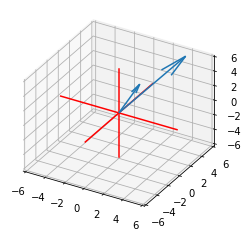

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')
a = [1,2,3]
b = [4,5,6]
data = np.column_stack((a,b))
origins = np.zeros(np.shape(data))
ax.quiver(*origins, *data)


scale_factor = 6
xl = ((-scale_factor,scale_factor),(0,0),(0,0))
yl = ((0,0),(-scale_factor,scale_factor),(0,0))
zl = ((0,0),(0,0),(-scale_factor,scale_factor))
for l in [xl,yl,zl]:
    ax.plot(*l, 'r')
ax.set_xlim(-scale_factor,scale_factor)
ax.set_ylim(-scale_factor,scale_factor)
ax.set_zlim(-scale_factor,scale_factor)

In [35]:
a = np.ones((20,3))*10
a_mod = np.sqrt(np.sum(np.power(a,2),axis=1))
a_scale = a/a_mod[:,None]
a_scale

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])